In [15]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import glob

# Data processing

## Loading and visualising data

In [16]:
IWV = xr.open_mfdataset('IWV/*.nc')
LWP = xr.open_mfdataset('LWP/*.nc')
MET = xr.open_mfdataset('MET/*.nc')
TPC = xr.open_mfdataset('TPC/*.nc')
HPC = xr.open_mfdataset('HPC/*.nc')
SPC = xr.open_mfdataset('SPC/*.nc')

In [17]:
BLH_19 = xr.open_mfdataset('BLH/240619.BLH.nc')

In [18]:
files = glob.glob('BLH/*.NC')

# Define a function to sort the dataset by time
def preprocess(ds):
    return ds.sortby('time')

# Open multiple files and apply preprocessing
BLH = xr.open_mfdataset(files, preprocess=preprocess)

In [19]:
TPC

<xarray.Dataset>
Dimensions:           (time: 3782, altitude_layer: 93)
Coordinates:
  * time              (time) datetime64[ns] 2024-06-17T22:03:11 ... 2024-06-2...
Dimensions without coordinates: altitude_layer
Data variables: (12/14)
    file_code         (time) int32 -2147483647 -2147483647 ... -2147483647
    Rad_ID            (time) int32 3 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3
    RSFactor          (time) int32 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    integration_time  (time) int32 60 60 60 60 60 60 60 ... 60 60 60 60 60 60 60
    retrieval         (time) int32 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2
    RF                (time) int32 dask.array<chunksize=(97,), meta=np.ndarray>
    ...                ...
    azimuth           (time) float32 dask.array<chunksize=(97,), meta=np.ndarray>
    right_ascension   (time) float32 dask.array<chunksize=(97,), meta=np.ndarray>
    declination       (time) float32 dask.array<chunksize=(97,), meta=np.ndarray>
    min_T             (time) float32 221.0 221.0 221.0 ... 225.7 225.7 225.7
    max_T             (time) float32 287.9 287.9 287.9 ... 287.9 287.9 287.9
    T_prof            (time, altitude_layer) float32 dask.array<chunksize=(97, 93), meta=np.ndarray>
Attributes:
    netCDF_Convention:             CF-1.0
    Radiometer_Location:           Delft University of Technology
    Radiometer_System:             RPG-HATPRO
    Serial_Number:                 003 0139
    Station_Altitude:              -4
    Station_Longitude:             51�59'46'' WesdisoTechnolo
    Station_Latitude:              -4�22'43'' NortisoTechnolo
    Comment:                       
    Radiometer_Software_Version:  V9.59
    Host-PC_Software_Version:     V9.59

In [20]:
MET

<xarray.Dataset>
Dimensions:            (time: 264070)
Coordinates:
  * time               (time) datetime64[ns] 2024-06-17T22:00:19 ... 2024-06-...
Data variables: (12/23)
    file_code          (time) int32 -2147483647 -2147483647 ... -2147483647
    Rad_ID             (time) int32 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3
    RSFactor           (time) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    IntSampCnt         (time) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    Min_P              (time) float32 1.014e+03 1.014e+03 ... 1.014e+03
    Max_P              (time) float32 1.014e+03 1.014e+03 ... 1.017e+03
    ...                 ...
    Min_WD             (time) float32 93.0 93.0 93.0 93.0 ... 0.0 0.0 0.0 0.0
    Max_WD             (time) float32 253.0 253.0 253.0 ... 357.0 357.0 357.0
    Surf_WD            (time) float32 dask.array<chunksize=(6841,), meta=np.ndarray>
    Min_RR             (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    maximum_Rain_Rate  (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Surf_RR            (time) float32 dask.array<chunksize=(6841,), meta=np.ndarray>
Attributes:
    netCDF_Convention:             CF-1.0
    Radiometer_Location:           Delft University of Technology
    Radiometer_System:             RPG-HATPRO
    Serial_Number:                 003 0139
    Station_Altitude:              -4
    Station_Longitude:             51�59'46'' WesdisoTechnolo
    Station_Latitude:              -4�22'43'' NortisoTechnolo
    Comment:                       
    Radiometer_Software_Version:  V9.59
    Host-PC_Software_Version:     V9.59

In [21]:
IWV

<xarray.Dataset>
Dimensions:     (time: 228818)
Coordinates:
  * time        (time) datetime64[ns] 2024-06-17T22:02:10 ... 2024-06-21T07:3...
Data variables:
    file_code   (time) int32 -2147483647 -2147483647 ... -2147483647 -2147483647
    Rad_ID      (time) int32 3 3 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3 3 3
    RSFactor    (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
    IntSampCnt  (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
    RF          (time) int32 dask.array<chunksize=(5821,), meta=np.ndarray>
    ElAng       (time) float32 dask.array<chunksize=(5821,), meta=np.ndarray>
    AziAng      (time) float32 dask.array<chunksize=(5821,), meta=np.ndarray>
    retrieval   (time) int32 2 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2 2 2
    Min_IWV     (time) float32 16.43 16.43 16.43 16.43 ... 21.53 21.53 21.53
    Max_IWV     (time) float32 18.44 18.44 18.44 18.44 ... 24.46 24.46 24.46
    IWV         (time) float32 dask.array<chunksize=(5821,), meta=np.ndarray>
Attributes:
    netCDF_Convention:             CF-1.0
    Radiometer_Location:           Delft University of Technology
    Radiometer_System:             RPG-HATPRO
    Serial_Number:                 003 0139
    Station_Altitude:              -4
    Station_Longitude:             51�59'46'' WesdisoTechnolo
    Station_Latitude:              -4�22'43'' NortisoTechnolo
    Comment:                       
    Radiometer_Software_Version:  V9.59
    Host-PC_Software_Version:     V9.59

In [22]:
LWP

<xarray.Dataset>
Dimensions:     (time: 228818)
Coordinates:
  * time        (time) datetime64[ns] 2024-06-17T22:02:10 ... 2024-06-21T07:3...
Data variables:
    file_code   (time) int32 -2147483647 -2147483647 ... -2147483647 -2147483647
    Rad_ID      (time) int32 3 3 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3 3 3
    RSFactor    (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
    IntSampCnt  (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
    RF          (time) int32 dask.array<chunksize=(5821,), meta=np.ndarray>
    ElAng       (time) float32 dask.array<chunksize=(5821,), meta=np.ndarray>
    AziAng      (time) float32 dask.array<chunksize=(5821,), meta=np.ndarray>
    retrieval   (time) int32 2 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2 2 2
    Min_LWP     (time) float32 -5.0 -5.0 -5.0 -5.0 -5.0 ... -5.0 -5.0 -5.0 -5.0
    Max_LWP     (time) float32 7.088 7.088 7.088 7.088 ... 97.89 97.89 97.89
    LWP         (time) float32 dask.array<chunksize=(5821,), meta=np.ndarray>
Attributes:
    netCDF_Convention:             CF-1.0
    Radiometer_Location:           Delft University of Technology
    Radiometer_System:             RPG-HATPRO
    Serial_Number:                 003 0139
    Station_Altitude:              -4
    Station_Longitude:             51�59'46'' WesdisoTechnolo
    Station_Latitude:              -4�22'43'' NortisoTechnolo
    Comment:                       
    Radiometer_Software_Version:  V9.59
    Host-PC_Software_Version:     V9.59

In [48]:
HPC.time[-1]

<xarray.DataArray 'time' ()>
array('2024-06-21T07:38:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2024-06-21T07:38:15
Attributes:
    long_name:  sample time
    comment:    time is UTC

In [25]:
indexer_17 = (MET.time >= pd.Timestamp("2024-06-17")) & (MET.time < pd.Timestamp("2024-06-18"))
indexer_18 = (MET.time >= pd.Timestamp("2024-06-18")) & (MET.time < pd.Timestamp("2024-06-19"))
indexer_19 = (MET.time >= pd.Timestamp("2024-06-19")) & (MET.time < pd.Timestamp("2024-06-20"))
indexer_20 = (MET.time >= pd.Timestamp("2024-06-20")) & (MET.time < pd.Timestamp("2024-06-21"))

# Boundary Layer Measurements

Text(0, 0.5, 'BLH [m]')

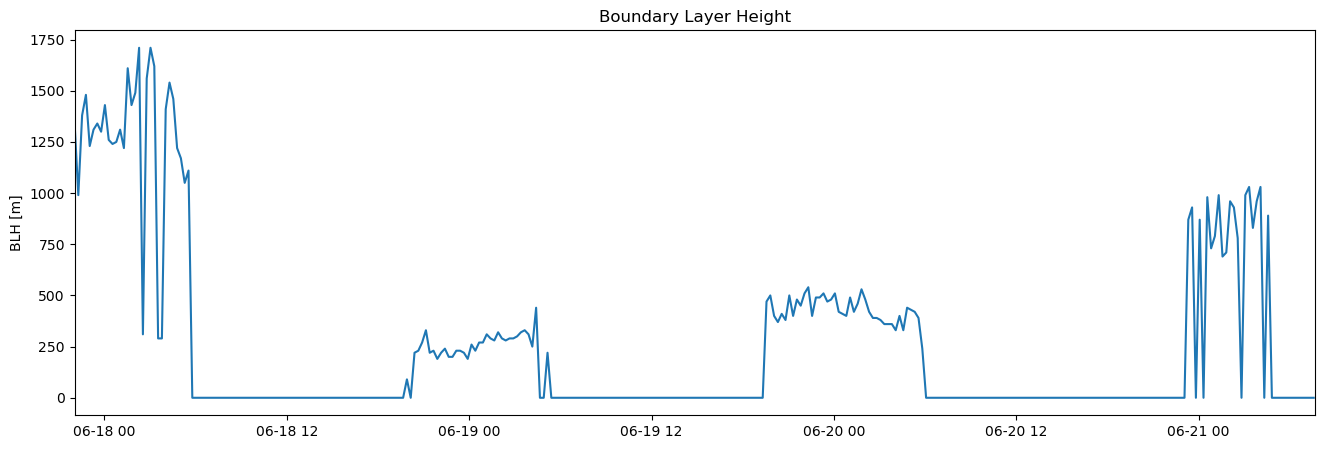

In [53]:
plt.figure(figsize=(16,5))
plt.plot(BLH.time,BLH.BLH)
plt.xlim(pd.Timestamp("2024-06-17T22:03:11.000000000"), pd.Timestamp("2024-06-21T07:38:15.000000000"))
plt.title('Boundary Layer Height')
plt.ylabel('BLH [m]')


(19893.0, 19894.0)

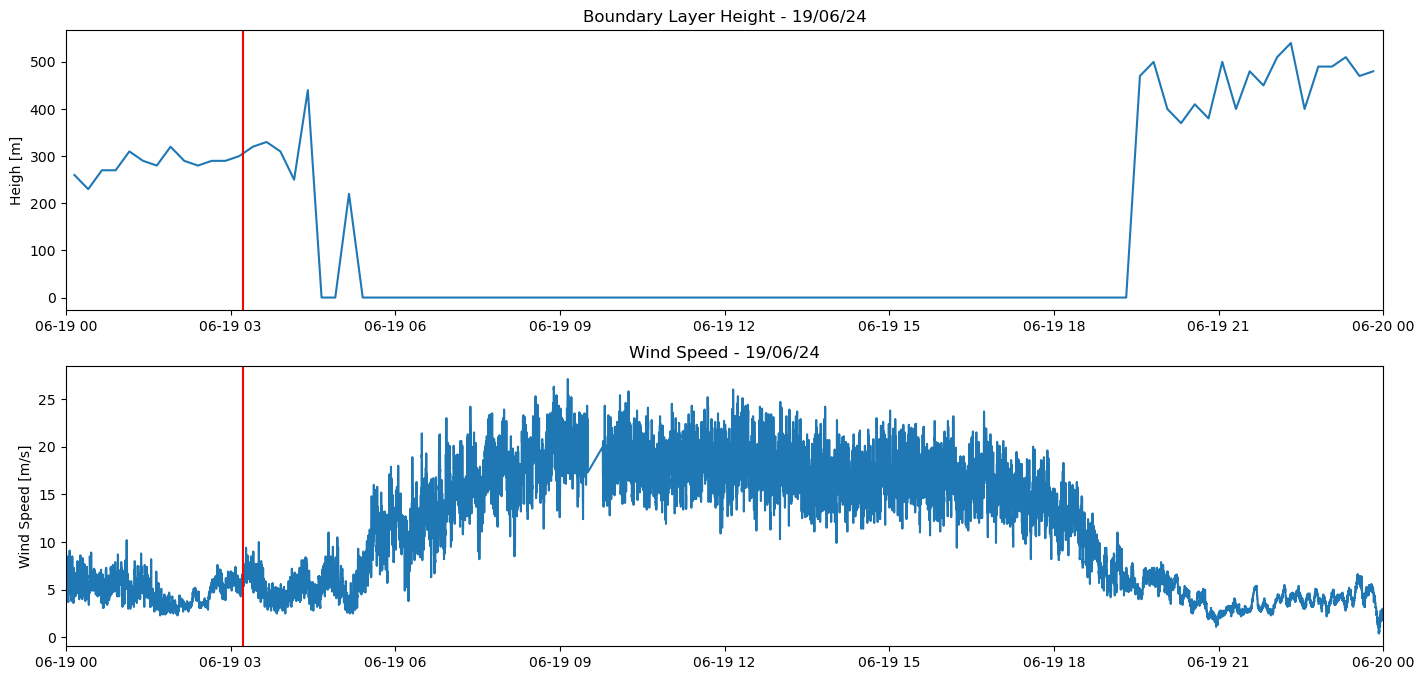

In [40]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(17,8))

ax1.plot(BLH_19.time, BLH_19.BLH)
ax1.set_title('Boundary Layer Height - 19/06/24')
ax1.axvline(pd.Timestamp('2024-06-19T03:14:00'), color='red')
ax1.set_ylabel('Heigh [m]')
ax1.set_xlim(pd.Timestamp("2024-06-19"), pd.Timestamp("2024-06-20"))


MET_19= MET.sel(time = indexer_19)

ax2.plot(MET_19.time, MET_19.Surf_WS)
ax2.set_title('Wind Speed - 19/06/24')
ax2.axvline(pd.Timestamp('2024-06-19T03:14:00'), color='red')
ax2.set_ylabel('Wind Speed [m/s]')
ax2.set_xlim(pd.Timestamp("2024-06-19"), pd.Timestamp("2024-06-20"))


# Liquid Water Cloud

Text(0, 0.5, 'Altitude [m]')

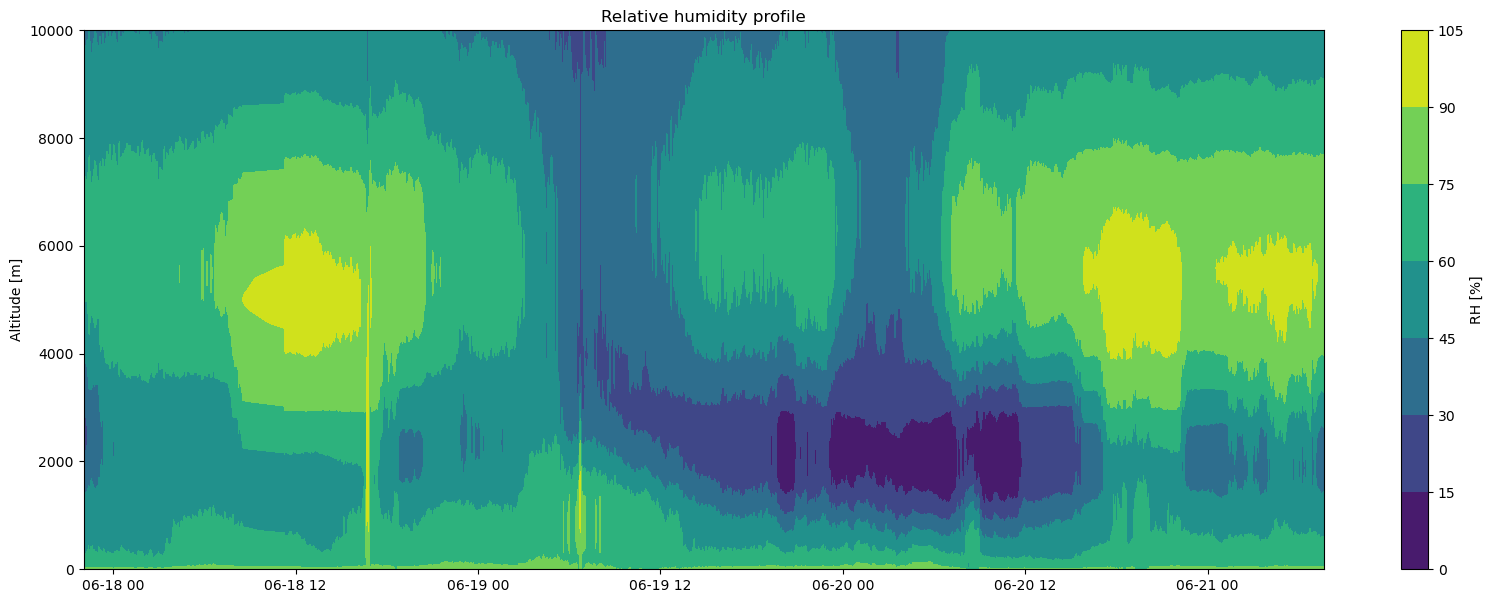

In [31]:
fig,ax = plt.subplots(1,figsize=(20,7))
contour = ax.contourf(HPC.time, HPC.altitude[1], HPC.RH_prof.T)
cbar = fig.colorbar(contour, ax=ax)
cbar.set_label('RH [%]')
ax.set_title('Relative humidity profile')
ax.set_ylabel('Altitude [m]')

In [83]:
zero_deg_altitudes = []

# Loop over each time step
for time in TPC.time:
    # Select the temperature profile at the current time step
    temp_profile = TPC.sel(time=time)

    # Interpolate to find the altitude where temperature is 0°C
    zero_deg_alt = np.interp(273.15, temp_profile.T_prof.values, temp_profile.altitude)

    # Append the result to the list
    zero_deg_altitudes.append(zero_deg_alt)

# Convert the list to a numpy array
zero_deg_altitudes = np.array(zero_deg_altitudes)

# If you want to attach the time dimension to the result
zero_deg_altitudes_da = xr.DataArray(zero_deg_altitudes, coords=[TPC.time], dims=["time"])


In [84]:
zero_deg_altitudes_da

<xarray.DataArray (time: 3782)>
array([10000., 10000., 10000., ..., 10000., 10000., 10000.])
Coordinates:
  * time     (time) datetime64[ns] 2024-06-17T22:03:11 ... 2024-06-21T06:59:11

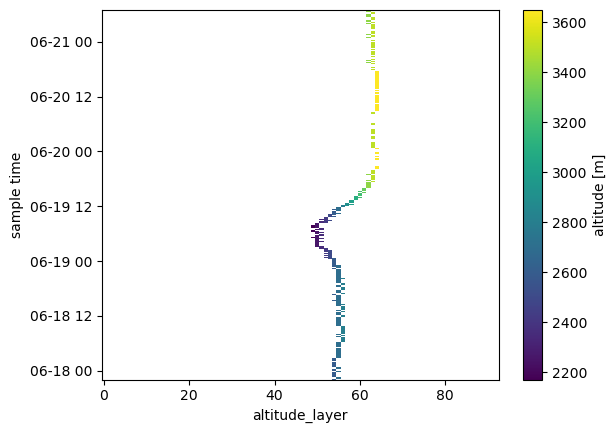

In [199]:
temp0 = TPC.altitude.where((TPC.T_prof.values > 272.8) & (TPC.T_prof.values < 273.3))
temp0.dropna(dim = 'time')
temp0.dropna(dim = 'altitude_layer')
temp0.squeeze()
temp0.resample(time = '1D')